In [1]:
import numpy as np

In [28]:
def process_file(filename):
    file = np.load(filename)
    bias = np.median(np.min(file['bias'],axis = -1),axis=-1)
    eevpd = np.median(file['eevpd'],axis=-1)
    return bias,eevpd

In [8]:
file = np.load('data/StandardNormal/mclmc1_0.1.npz')

In [9]:
file['stepsize']

array([ 2.5      ,  2.6734493,  2.8589323,  3.0572844,  3.269398 ,
        3.4962277,  3.7387953,  3.9981914,  4.2755847,  4.5722237,
        4.8894424,  5.2286706,  5.5914354,  5.979367 ,  6.3942137,
        6.8378415,  7.312249 ,  7.819571 ,  8.362091 ,  8.942249 ,
        9.56266  , 10.226115 , 10.935601 , 11.694309 , 12.505659 ,
       13.373296 , 14.30113  , 15.293341 , 16.354385 , 17.489052 ,
       18.702435 , 20.000002 ], dtype=float32)

In [10]:
file['bias'].shape

(32, 4, 10000)

In [11]:
file['eevpd'].shape

(32, 4)

In [40]:
filenames = [
    'data/StandardNormal/mclmc1.npz',
    'data/StandardNormal/mclmc1_1.0.npz',
    'data/StandardNormal/mclmc1_0.5.npz',
    'data/StandardNormal/mclmc1_0.1.npz',
    'data/StandardNormal/mclmc1_0.01.npz',
]

bs = []
eevpds = []
for i in range(len(filenames)):
    b,eevpd = process_file(filenames[i])
    bs.append(b)
    eevpds.append(eevpd)

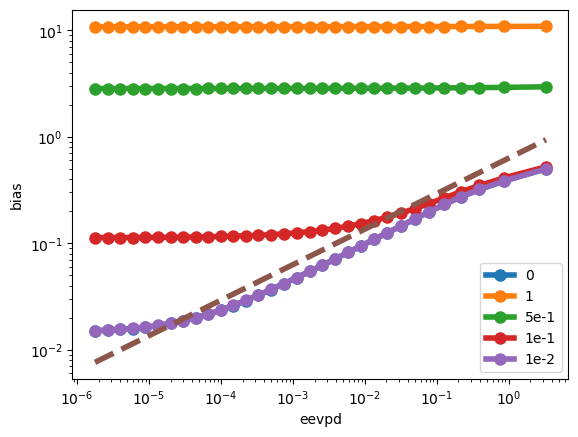

In [42]:
import matplotlib.pyplot as plt
for i in range(len(filenames)):
    plt.loglog(eevpds[i],np.sqrt(bs[i]), 'o-', lw= 4, markersize = 8,)
plt.loglog(eevpd,(eevpd/4)**(1/3), '--', lw= 4, markersize = 8,)
plt.xlabel('eevpd')
plt.ylabel('bias')
plt.legend(['0','1','5e-1','1e-1','1e-2'])

Text(0, 0.5, 'bias')

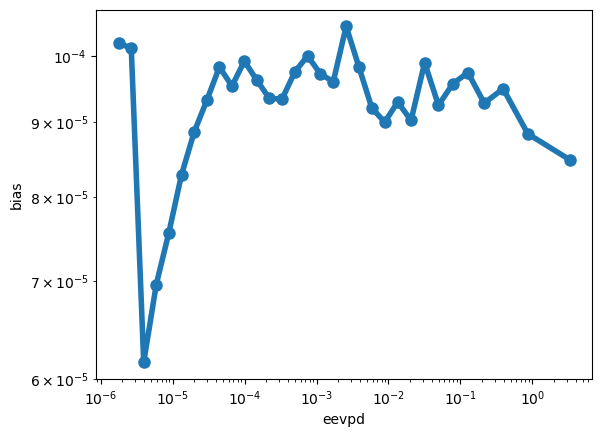

In [37]:
import matplotlib.pyplot as plt
plt.loglog(eevpds[0],np.sqrt(bs[2]) - np.sqrt(bs[0]), 'o-', lw= 4, markersize = 8,)

plt.xlabel('eevpd')
plt.ylabel('bias')

In [36]:
np.sqrt(bs[0])-np.sqrt(bs[2])

array([-1.01943500e-04, -1.01206824e-04, -6.15688041e-05, -6.96256757e-05,
       -7.55842775e-05, -8.28262419e-05, -8.86302441e-05, -9.31862742e-05,
       -9.82023776e-05, -9.52966511e-05, -9.91187990e-05, -9.61571932e-05,
       -9.34321433e-05, -9.33632255e-05, -9.74349678e-05, -9.99532640e-05,
       -9.71294940e-05, -9.59523022e-05, -1.04725361e-04, -9.81613994e-05,
       -9.20295715e-05, -9.00030136e-05, -9.29087400e-05, -9.02563334e-05,
       -9.88692045e-05, -9.24468040e-05, -9.56356525e-05, -9.73343849e-05,
       -9.27448273e-05, -9.48905945e-05, -8.83638859e-05, -8.48174095e-05],
      dtype=float32)